Today we're going to utilize a very simple (but rich) data set housed in the UCI Machine Learning repository. The Adult Income Dataset is taken from US Census information and is formatted particularly well to study the features/regressors/predictors that go into determining whether an adult US resident is 'likely' to have a household income greater than $50,000. 

The data includes age, workclass, a weight variable (to account for the unbalanced sampling), education level, time spent in education (in years), marital status, occupation, relationship, race, sex, individuals residency, and a target column that indicates whether the person attained a household income greater than $50,000. All in all, an interested data set for socio-economic research. So let's get our hands dirty and load up some data!

In [42]:
from sklearn import naive_bayes
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# Load the data 

Load the adult data set, which is just .txt file. There are no column labels. Read the docs for the data set here: https://archive.ics.uci.edu/ml/datasets/Adult, and use the in-built Pandas dataframe options to attach the column labels into the data frame. 

In [2]:
import pandas as pd

In [28]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
column_names=["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Marital Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss", "Hours per week", "Country", "Target"]
df=pd.read_csv(url,header=None,names=column_names)
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.shape

(32561, 15)

# Convert the categorical variables into unordered integral values

For us to use the scikit-learn (although not every implementation of) Naive Bayes, we must pass in numerical data. Since we have decided to analyze all unordered categorical values, we can do a one-hot encoding to convert our categorical data into a numerical data frame.

**Note**: Do not use scikit-learn's implementation of One-hot encoding, we want to get you familiar with a bunch of methods, but as you should know by now, there are many ways to do the same thing. If you want, to a challenge, you can write the procedure both from scikit-learn and Pandas method. 

In [10]:
df.columns

Index([u'Age', u'Workclass', u'fnlwgt', u'Education', u'Education-Num',
       u'Martial Status', u'Occupation', u'Relationship', u'Race', u'Sex',
       u'Capital Gain', u'Capital Loss', u'Hours per week', u'Country',
       u'Target'],
      dtype='object')

In [32]:
cat_names=["Workclass","Education","Marital Status","Country"]

print df['Workclass'].value_counts(),'\n'
print df['Education'].value_counts(),'\n'
print df['Marital Status'].value_counts(),'\n'
print df['Country'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64 

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64 

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital Status, dtype: int64 

 United-States                 29170
 Mexico                    

In [37]:
len(df[['Workclass']]=='?')

32561

In [ ]:
column_names=["Workclass", "Education", "Marital Status",
        "Occupation", "Relationship", "Race", "Sex", "Country", "Target"]

In [58]:

df2 = pd.get_dummies(df)
df2

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia,Target_ <=50K,Target_ >50K
0,39,77516,13,2174,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,50,83311,13,0,0,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,38,215646,9,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,53,234721,7,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,28,338409,13,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,37,284582,14,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,49,160187,5,0,0,16,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,52,209642,9,0,0,45,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,31,45781,14,14084,0,50,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9,42,159449,13,5178,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [78]:
df2=df.join(df_dum)
df2.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,...,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia,Target_ <=50K,Target_ >50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [59]:
df2.columns

Index([u'Age', u'fnlwgt', u'Education-Num', u'Capital Gain', u'Capital Loss',
       u'Hours per week', u'Workclass_ ?', u'Workclass_ Federal-gov',
       u'Workclass_ Local-gov', u'Workclass_ Never-worked',
       ...
       u'Country_ Scotland', u'Country_ South', u'Country_ Taiwan',
       u'Country_ Thailand', u'Country_ Trinadad&Tobago',
       u'Country_ United-States', u'Country_ Vietnam', u'Country_ Yugoslavia',
       u'Target_ <=50K', u'Target_ >50K'],
      dtype='object', length=110)

In [41]:
df2.shape

(32561, 119)

# Challenge Problem: Alternative Encoding Scheme to One-Hot Encoding

Likewise, beside doing a One-hot encoding, we could also map each string label in our categorical features to a integral value. As we previously leveraged a Pandas data frame method to do the encoding, we are now going to test out a scikit-learn method to impose the integral value encoding. Please check the docs and read up on: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. Proceed with the encoding and build a Naive Bayes and Logistic classifier for both. Do we get similar results? What should we expect? And why?

In [45]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
#enc.fit()

In [ ]:
enc.fit()

# Summarize the data and engage in elementary data exploration

For some data exploration, use Pandas histogram methods to display the features. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11648f0d0>]], dtype=object)

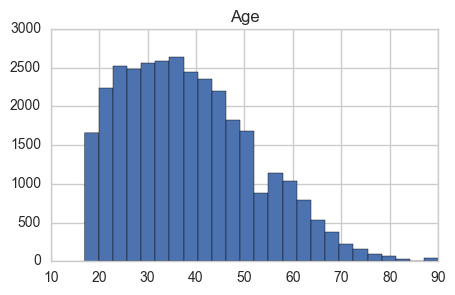

In [66]:
# Write histogram functions here, and/or any other data visualizations
df2.hist(column='Age',bins=25,figsize=[5,3])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116533690>]], dtype=object)

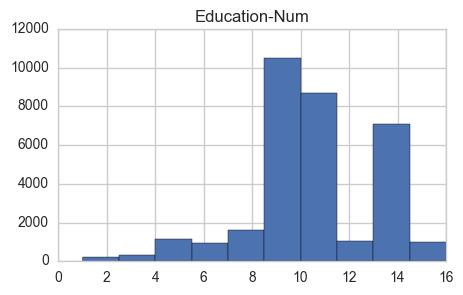

In [60]:
df2.hist(column='Education-Num',figsize=[5,3])

In [81]:
df2.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,...,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia,Target_ <=50K,Target_ >50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [83]:
df2.columns

Index([u'Age', u'Workclass', u'fnlwgt', u'Education', u'Education-Num',
       u'Marital Status', u'Occupation', u'Relationship', u'Race', u'Sex',
       ...
       u'Country_ Scotland', u'Country_ South', u'Country_ Taiwan',
       u'Country_ Thailand', u'Country_ Trinadad&Tobago',
       u'Country_ United-States', u'Country_ Vietnam', u'Country_ Yugoslavia',
       u'Target_ <=50K', u'Target_ >50K'],
      dtype='object', length=119)

In [82]:
df3=df2.copy()

In [88]:
#df3=df3.drop(['Target_ >50K'],axis=1)


In [90]:
df3.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,...,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia,Target_ <=50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Partition the data

Without using any direct method/libraries that would automatically accomplish this, please partition the data set 70/30. You can use anything from the math, pandas, or numpy library, do not use other libraries. 

In [74]:
# split=df2.sample(frac=1)
# train=split.iloc[0:22793]
# test=split.iloc[22793:]

In [100]:
df3.dtypes

Age                                      int64
Workclass                               object
fnlwgt                                   int64
Education                               object
Education-Num                            int64
Marital Status                          object
Occupation                              object
Relationship                            object
Race                                    object
Sex                                     object
Capital Gain                             int64
Capital Loss                             int64
Hours per week                           int64
Country                                 object
Target                                  object
Workclass_ ?                           float64
Workclass_ Federal-gov                 float64
Workclass_ Local-gov                   float64
Workclass_ Never-worked                float64
Workclass_ Private                     float64
Workclass_ Self-emp-inc                float64
Workclass_ Se

In [70]:
list(df2.columns)

['Age',
 'fnlwgt',
 'Education-Num',
 'Capital Gain',
 'Capital Loss',
 'Hours per week',
 'Workclass_ ?',
 'Workclass_ Federal-gov',
 'Workclass_ Local-gov',
 'Workclass_ Never-worked',
 'Workclass_ Private',
 'Workclass_ Self-emp-inc',
 'Workclass_ Self-emp-not-inc',
 'Workclass_ State-gov',
 'Workclass_ Without-pay',
 'Education_ 10th',
 'Education_ 11th',
 'Education_ 12th',
 'Education_ 1st-4th',
 'Education_ 5th-6th',
 'Education_ 7th-8th',
 'Education_ 9th',
 'Education_ Assoc-acdm',
 'Education_ Assoc-voc',
 'Education_ Bachelors',
 'Education_ Doctorate',
 'Education_ HS-grad',
 'Education_ Masters',
 'Education_ Preschool',
 'Education_ Prof-school',
 'Education_ Some-college',
 'Marital Status_ Divorced',
 'Marital Status_ Married-AF-spouse',
 'Marital Status_ Married-civ-spouse',
 'Marital Status_ Married-spouse-absent',
 'Marital Status_ Never-married',
 'Marital Status_ Separated',
 'Marital Status_ Widowed',
 'Occupation_ ?',
 'Occupation_ Adm-clerical',
 'Occupation_ Ar

In [ ]:
# from sklearn.cross_validation import train_test_split
# Xtrain,Xtest,ytrain,ytest = train_test_split(df_dum)(X,y,test_size=0.3, random_state=42

# Define your feature set and define your target 

In [ ]:
df3

In [92]:
partition_val = np.random.rand(len(df3)) < 0.70
train = df3[partition_val]
test = df3[~partition_val]

In [103]:
target_train = train['Target_ <=50K']
feature_train = train.drop('Target_ <=50K', axis=1)
target_train.dtypes

dtype('float64')

# Run Naive Bayes Classifier

Instantiate the Naive Bayes predictor from scikit-learn with the training data. 

In [72]:
# def evaluate(model):
#     model.fit(Xtrain,ytrain)
#     ypred = model.predict(Xtest)
#     a=accuracy_score(ytest, ypred)
#     return a

In [104]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score

In [ ]:
# mnb = MultinomialNB()
# gnb = GaussianNB()
# bnb = BernoulliNB()
# models =[mnb,gnb,bnb]
# score=[]
# for model in models:
#     score.append(evaluate(model))
# print score

In [105]:
mnb = MultinomialNB()
mnb.fit(feature_train, target_train)

ValueError: could not convert string to float: <=50K

# Check Accuracy / Score for Naive Bayes

Define the target and feature set for the test data

Score the Naive Bayes classifier on the test data

# Check Accuracy / Score for a Logistic Classifier 

Define a logistic regression and train it with the feature and target set

Produce the accuracy score of the logistic regression from the test set

Was that what you expected? All we did was remove non categorical variables, and imposed a One-hot encoding, should we have expected the Naive Bayes to underperform the Logistic? Here are some other things you can think about:

1. What other metrics outside of simple accuracy can we utilize to measure performance?
2. Could some pair-wise correlation between pair-wise features in our feature set have caused an issue with the Naive Bayes? What are the assumptions for Naive Bayes which may cause this to happen? 
3. How could we improve the performance of Naive Bayes? 
4. What about the numerica features we left out, should we bring them back in? How?

If you want to expand on your analysis, why not build a correlation matrix, or perhaps print a summary of the logistic regression, would an ANOVA table help in our assessment for this case? 